In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
from pathlib import Path
import IPython.display as ipd

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
%matplotlib inline

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
train



In [2]:
print(check_output(["ls", "../input/train"]).decode("utf8"))


LICENSE
README.md
audio
testing_list.txt
validation_list.txt



In [3]:

folders = os.listdir("../input/train/audio")
print(folders)

['stop', 'cat', 'three', 'go', 'bird', 'off', 'left', 'no', 'two', 'wow', 'sheila', 'tree', 'one', 'yes', 'nine', 'right', 'dog', 'eight', 'down', 'happy', 'six', 'zero', 'up', 'house', 'seven', '_background_noise_', 'bed', 'four', 'on', 'five', 'marvin']


In [18]:
train_audio_path = '../input/train/audio'
train_labels = os.listdir(train_audio_path)


train_labels.remove('_background_noise_')
train_labels

print(f'Number of labels: {len(train_labels)}')


Number of labels: 30


In [19]:
labels_to_keep = ['yes', 'no', 'up', 'down', 'left',
                  'right', 'on', 'off', 'stop', 'go', 'silence']


In [26]:
train_file_labels = dict()

for label in train_labels:
    files = os.listdir(train_audio_path + '/' + label)
    for f in files:
        train_file_labels[label + '/' + f] = label

train_file_labels


{'stop/ea1f888c_nohash_0.wav': 'stop',
 'stop/1b4c9b89_nohash_3.wav': 'stop',
 'stop/7e6bd776_nohash_2.wav': 'stop',
 'stop/c948d727_nohash_3.wav': 'stop',
 'stop/190821dc_nohash_1.wav': 'stop',
 'stop/41777abb_nohash_1.wav': 'stop',
 'stop/6af4aa07_nohash_0.wav': 'stop',
 'stop/24befdb3_nohash_3.wav': 'stop',
 'stop/e04d7130_nohash_0.wav': 'stop',
 'stop/370844f7_nohash_0.wav': 'stop',
 'stop/5184ed3e_nohash_0.wav': 'stop',
 'stop/3c257192_nohash_0.wav': 'stop',
 'stop/8dd788d8_nohash_2.wav': 'stop',
 'stop/1eddce1d_nohash_3.wav': 'stop',
 'stop/712e4d58_nohash_3.wav': 'stop',
 'stop/71904de3_nohash_1.wav': 'stop',
 'stop/53458368_nohash_1.wav': 'stop',
 'stop/bab36420_nohash_0.wav': 'stop',
 'stop/86b89661_nohash_0.wav': 'stop',
 'stop/8eb4a1bf_nohash_4.wav': 'stop',
 'stop/0d2bcf9d_nohash_0.wav': 'stop',
 'stop/b0f24c9b_nohash_1.wav': 'stop',
 'stop/c93d5e22_nohash_3.wav': 'stop',
 'stop/88053e92_nohash_2.wav': 'stop',
 'stop/fe5c4a7a_nohash_0.wav': 'stop',
 'stop/df280250_nohash_1.

In [35]:
train = pd.DataFrame.from_dict(train_file_labels, orient='index')
train = train.reset_index(drop=False)
train = train.rename(columns={'index': 'file', 0: 'folder'})
train = train[['folder', 'file']]
train = train.sort_values('file')
train = train.reset_index(drop=True)
print(train.shape)


train

(64721, 2)


,folder,file
0,bed,bed/00176480_nohash_0.wav
1,bed,bed/004ae714_nohash_0.wav
2,bed,bed/004ae714_nohash_1.wav
3,bed,bed/00f0204f_nohash_0.wav
4,bed,bed/00f0204f_nohash_1.wav
5,bed,bed/012c8314_nohash_0.wav
6,bed,bed/012c8314_nohash_1.wav
7,bed,bed/0132a06d_nohash_0.wav
8,bed,bed/0135f3f2_nohash_0.wav
9,bed,bed/0137b3f4_nohash_0.wav


In [53]:
def remove_label_from_file(label, fname):
    return fname[len(label)+1:]

train['file'] = train.apply(lambda x: remove_label_from_file(x, 'file'), axis=1)
train['label'] = train['folder'].apply(lambda x: x if x in labels_to_keep else 'unknown')

train

,folder,file,label
0,bed,,unknown
1,bed,,unknown
2,bed,,unknown
3,bed,,unknown
4,bed,,unknown
5,bed,,unknown
6,bed,,unknown
7,bed,,unknown
8,bed,,unknown
9,bed,,unknown


In [54]:
sample_rate, samples = wavfile.read(str(train_audio_path) + '/house/61e50f62_nohash_1.wav')
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)

In [55]:
sample_rate


16000

In [56]:
frequencies

array([    0. ,    62.5,   125. ,   187.5,   250. ,   312.5,   375. ,
         437.5,   500. ,   562.5,   625. ,   687.5,   750. ,   812.5,
         875. ,   937.5,  1000. ,  1062.5,  1125. ,  1187.5,  1250. ,
        1312.5,  1375. ,  1437.5,  1500. ,  1562.5,  1625. ,  1687.5,
        1750. ,  1812.5,  1875. ,  1937.5,  2000. ,  2062.5,  2125. ,
        2187.5,  2250. ,  2312.5,  2375. ,  2437.5,  2500. ,  2562.5,
        2625. ,  2687.5,  2750. ,  2812.5,  2875. ,  2937.5,  3000. ,
        3062.5,  3125. ,  3187.5,  3250. ,  3312.5,  3375. ,  3437.5,
        3500. ,  3562.5,  3625. ,  3687.5,  3750. ,  3812.5,  3875. ,
        3937.5,  4000. ,  4062.5,  4125. ,  4187.5,  4250. ,  4312.5,
        4375. ,  4437.5,  4500. ,  4562.5,  4625. ,  4687.5,  4750. ,
        4812.5,  4875. ,  4937.5,  5000. ,  5062.5,  5125. ,  5187.5,
        5250. ,  5312.5,  5375. ,  5437.5,  5500. ,  5562.5,  5625. ,
        5687.5,  5750. ,  5812.5,  5875. ,  5937.5,  6000. ,  6062.5,
        6125. ,  618

In [57]:
times

array([ 0.008,  0.022,  0.036,  0.05 ,  0.064,  0.078,  0.092,  0.106,
        0.12 ,  0.134,  0.148,  0.162,  0.176,  0.19 ,  0.204,  0.218,
        0.232,  0.246,  0.26 ,  0.274,  0.288,  0.302,  0.316,  0.33 ,
        0.344,  0.358,  0.372,  0.386,  0.4  ,  0.414,  0.428,  0.442,
        0.456,  0.47 ,  0.484,  0.498,  0.512,  0.526,  0.54 ,  0.554,
        0.568,  0.582,  0.596,  0.61 ,  0.624,  0.638,  0.652,  0.666,
        0.68 ,  0.694,  0.708,  0.722,  0.736,  0.75 ,  0.764,  0.778,
        0.792,  0.806,  0.82 ,  0.834,  0.848,  0.862,  0.876,  0.89 ,
        0.904,  0.918,  0.932,  0.946,  0.96 ,  0.974,  0.988])

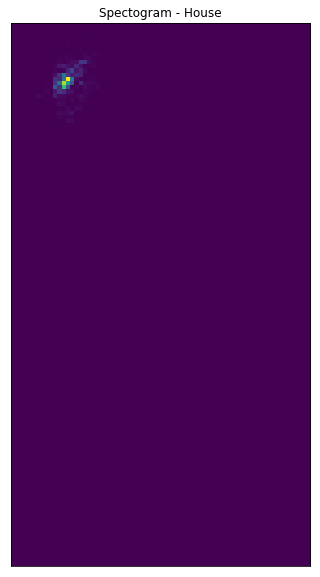

In [58]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - House')
ax1.imshow(spectogram)

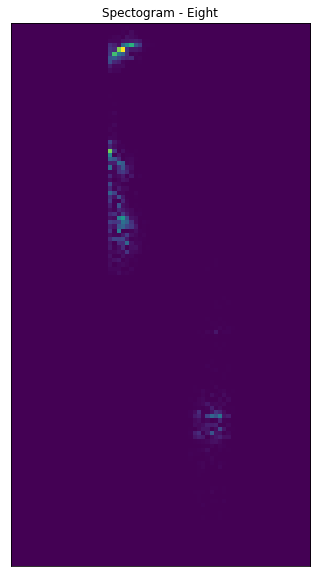

In [59]:
sample_rate, samples = wavfile.read(str(train_audio_path) + '/eight/25132942_nohash_2.wav')
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - Eight')
ax1.imshow(spectogram)

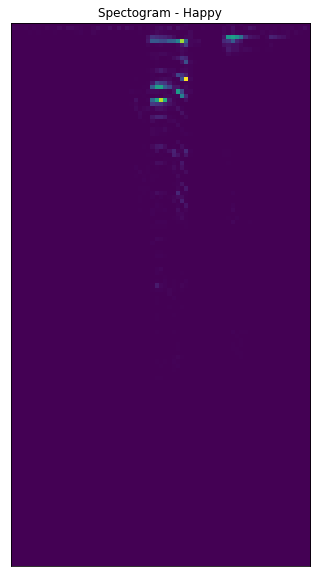

In [60]:
sample_rate, samples = wavfile.read(str(train_audio_path) + '/happy/43f57297_nohash_0.wav')
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - Happy')
ax1.imshow(spectogram)

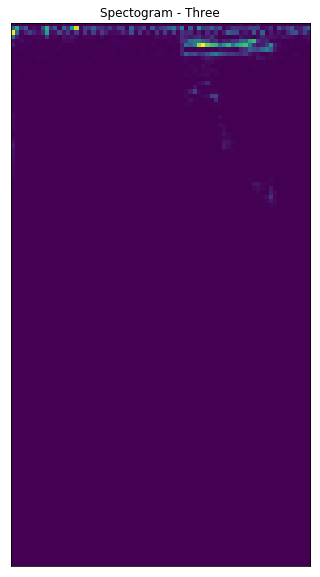

In [61]:
sample_rate, samples = wavfile.read(str(train_audio_path) + '/three/19e246ad_nohash_0.wav')
frequencies, times, spectogram = signal.spectrogram(samples, sample_rate)
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - Three')
ax1.imshow(spectogram)